In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# **Loading Datasets**

In [2]:
# Define the column names
columns = ['HCHO reading', 'Location', 'Current Date', 'Next Date']

# Load the data for 'Colombo Proper', 'Deniyaya, Matara', 'Nuwara Eliya Proper'
col_mat_nuw_data = pd.read_csv("City_DS\col_mat_nuw_output.csv", names=columns)

# Load the data for 'Bibile, Monaragala', 'Kurunegala Proper', 'Jaffna Proper'
mon_kur_jaf_data = pd.read_csv("City_DS\mon_kur_jaf_output.csv", names=columns)

# Load the data for 'Kandy Proper'
kan_data = pd.read_csv("City_DS\kan_output.csv", names=columns)

# Check the first few rows of each dataset to understand the structure
print("Colombo, Deniyaya, Nuwara Eliya Data:")
print(col_mat_nuw_data.head())

print("\nBibile, Kurunegala, Jaffna Data:")
print(mon_kur_jaf_data.head())

print("\nKandy Data:")
print(kan_data.head())

Colombo, Deniyaya, Nuwara Eliya Data:
   HCHO reading        Location Current Date   Next Date
0      0.000197  Colombo Proper   2019-01-01  2019-01-02
1      0.000263  Colombo Proper   2019-01-02  2019-01-03
2      0.000099  Colombo Proper   2019-01-03  2019-01-04
3      0.000210  Colombo Proper   2019-01-04  2019-01-05
4      0.000179  Colombo Proper   2019-01-05  2019-01-06

Bibile, Kurunegala, Jaffna Data:
   HCHO reading            Location Current Date   Next Date
0           NaN  Bibile, Monaragala   2019-01-01  2019-01-02
1      0.000019  Bibile, Monaragala   2019-01-02  2019-01-03
2      0.000028  Bibile, Monaragala   2019-01-03  2019-01-04
3      0.000037  Bibile, Monaragala   2019-01-04  2019-01-05
4     -0.000018  Bibile, Monaragala   2019-01-05  2019-01-06

Kandy Data:
   HCHO reading      Location Current Date   Next Date
0      0.000176  Kandy Proper   2019-01-01  2019-01-02
1      0.000092  Kandy Proper   2019-01-02  2019-01-03
2           NaN  Kandy Proper   2019-01-03

# **Merge Datasets**

In [3]:
# Combine the datasets into one dataframe
combined_data = pd.concat([col_mat_nuw_data, mon_kur_jaf_data, kan_data], ignore_index=True)

# Check the combined dataframe
print("\nCombined Data:")
combined_data



Combined Data:


HCHO reading        Location Current Date   Next Date
0          0.000197  Colombo Proper   2019-01-01  2019-01-02
1          0.000263  Colombo Proper   2019-01-02  2019-01-03
2          0.000099  Colombo Proper   2019-01-03  2019-01-04
3          0.000210  Colombo Proper   2019-01-04  2019-01-05
4          0.000179  Colombo Proper   2019-01-05  2019-01-06
...             ...             ...          ...         ...
12777           NaN    Kandy Proper   2023-12-27  2023-12-28
12778           NaN    Kandy Proper   2023-12-28  2023-12-29
12779           NaN    Kandy Proper   2023-12-29  2023-12-30
12780      0.000056    Kandy Proper   2023-12-30  2023-12-31
12781           NaN    Kandy Proper   2023-12-31  2024-01-01

[12782 rows x 4 columns]

# **Checking Missing Values and Replacing**

In [4]:
# Check for missing values in each dataset
print("Missing Values in Colombo, Deniyaya, Nuwara Eliya Data:")
print(combined_data.isnull().sum())

# Replace missing values with forward filling
combined_data.fillna(method='ffill', inplace=True)

# Check for missing values after forward filling
print("Missing Values in Combined Data after forward filling:")
print(combined_data.isnull().sum())

print("\nShape of Combined Data after forward filling:", combined_data.shape)

combined_data


Missing Values in Colombo, Deniyaya, Nuwara Eliya Data:
HCHO reading    4864
Location           0
Current Date       0
Next Date          0
dtype: int64
Missing Values in Combined Data after forward filling:
HCHO reading    0
Location        0
Current Date    0
Next Date       0
dtype: int64

Shape of Combined Data after forward filling: (12782, 4)


C:\Users\MSI\AppData\Local\Temp\ipykernel_320\861714501.py:6: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  combined_data.fillna(method='ffill', inplace=True)


HCHO reading        Location Current Date   Next Date
0          0.000197  Colombo Proper   2019-01-01  2019-01-02
1          0.000263  Colombo Proper   2019-01-02  2019-01-03
2          0.000099  Colombo Proper   2019-01-03  2019-01-04
3          0.000210  Colombo Proper   2019-01-04  2019-01-05
4          0.000179  Colombo Proper   2019-01-05  2019-01-06
...             ...             ...          ...         ...
12777      0.000116    Kandy Proper   2023-12-27  2023-12-28
12778      0.000116    Kandy Proper   2023-12-28  2023-12-29
12779      0.000116    Kandy Proper   2023-12-29  2023-12-30
12780      0.000056    Kandy Proper   2023-12-30  2023-12-31
12781      0.000056    Kandy Proper   2023-12-31  2024-01-01

[12782 rows x 4 columns]

# **Outlier detection and removal**


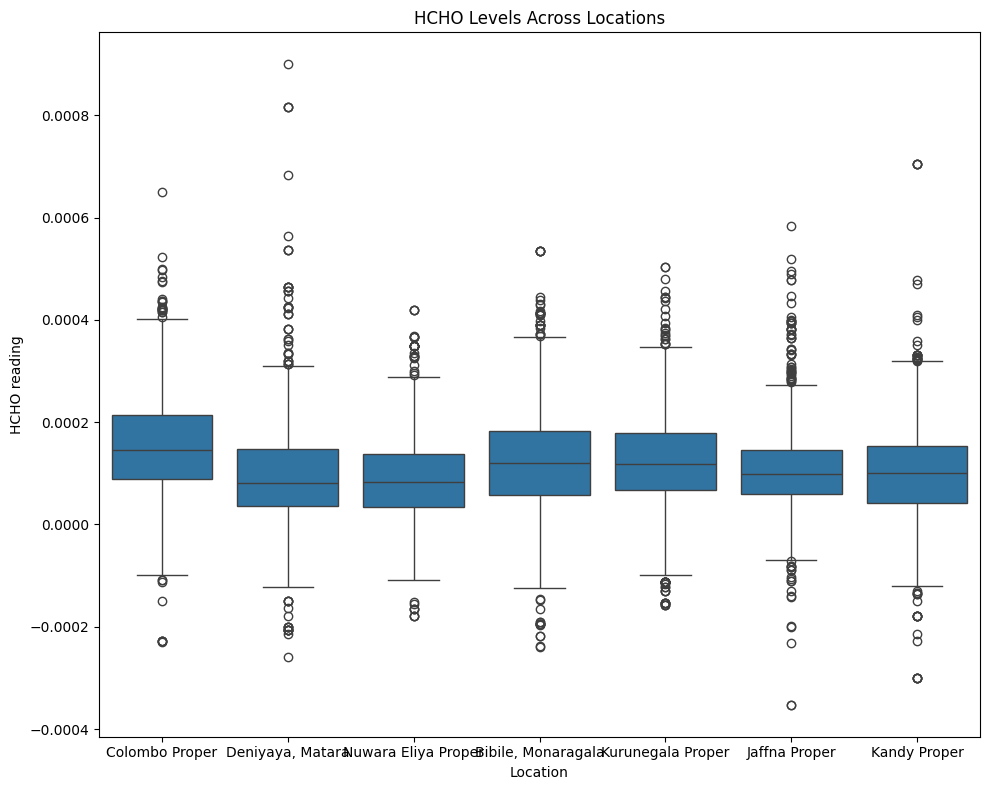

In [5]:

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(10, 8))

# Plot boxplot for all locations
sns.boxplot(data=combined_data, x='Location', y='HCHO reading', ax=ax)
ax.set_title('HCHO Levels Across Locations')

plt.tight_layout()
plt.show()

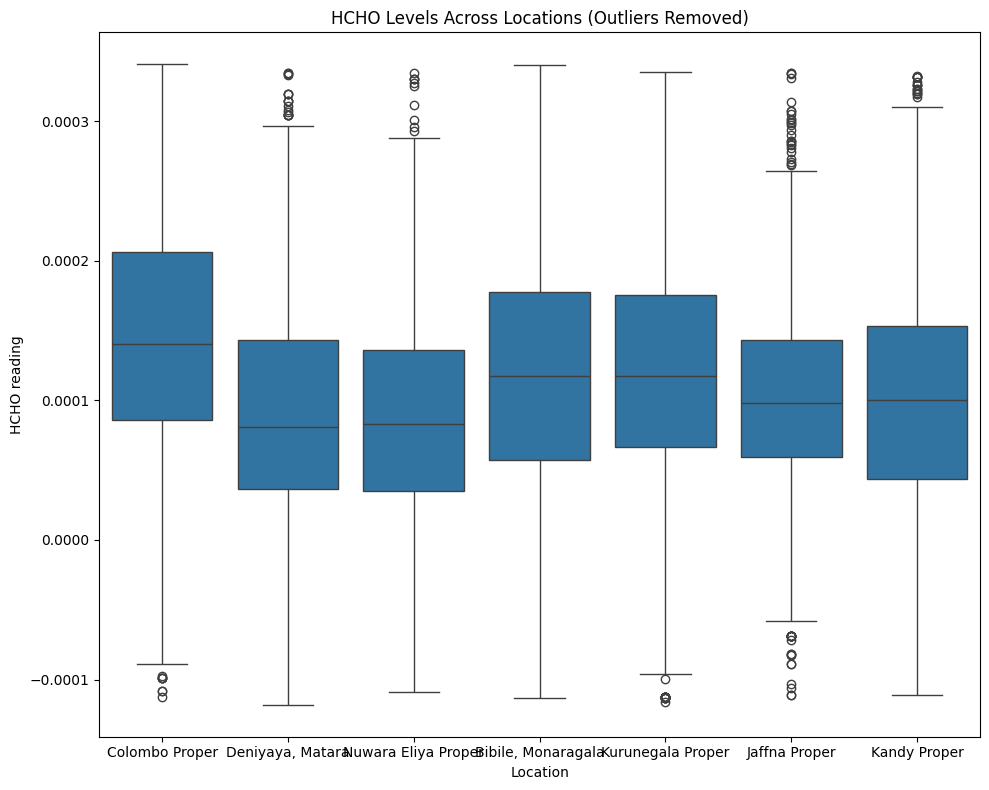

In [6]:
# Define a function to remove outliers based on IQR method
def remove_outliers(df):
    numeric_df = pd.to_numeric(df, errors='coerce')
    Q1 = numeric_df.quantile(0.25)
    Q3 = numeric_df.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(numeric_df >= lower_bound) & (numeric_df <= upper_bound)]

# Remove outliers from combined_data
combined_data['HCHO reading'] = remove_outliers(combined_data['HCHO reading'])

# Set up the figure and axes
fig, ax = plt.subplots(figsize=(10, 8))

# Plot boxplot for all locations after removing outliers
sns.boxplot(data=combined_data, x='Location', y='HCHO reading', ax=ax)
ax.set_title('HCHO Levels Across Locations (Outliers Removed)')

plt.tight_layout()
plt.show()


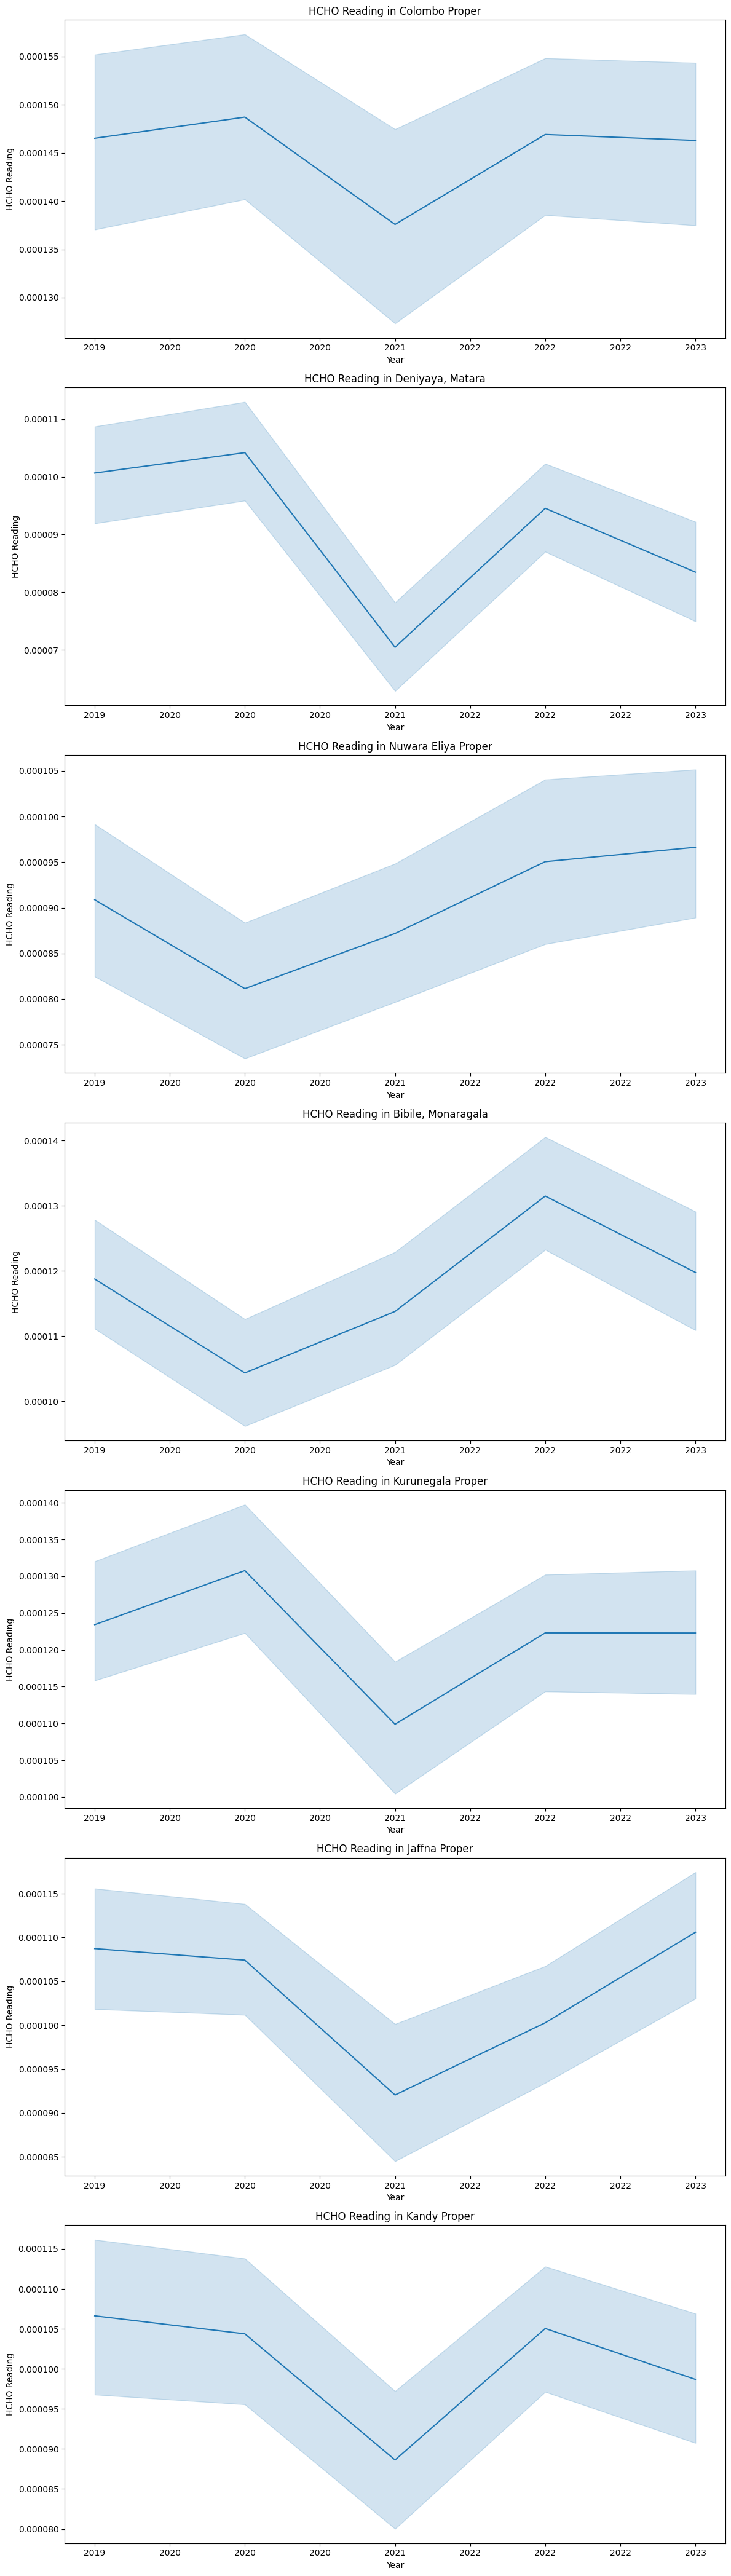

In [7]:
unique_cities = combined_data['Location'].unique()

# Convert year to integer
combined_data['Year'] = pd.to_datetime(combined_data['Current Date']).dt.year.astype(int)

# Set up the figure and axes
fig, axes = plt.subplots(nrows=len(unique_cities), ncols=1, figsize=(12, len(unique_cities) * 6))

# Plot line chart for HCHO readings for each city
for i, city in enumerate(unique_cities):
    city_data = combined_data[combined_data['Location'] == city]
    sns.lineplot(data=city_data, x='Year', y='HCHO reading', ax=axes[i])
    axes[i].set_title(f'HCHO Reading in {city}')
    axes[i].set_xlabel('Year')
    axes[i].set_ylabel('HCHO Reading')

    # Set integer formatting for the x-axis ticks
    axes[i].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: '{:.0f}'.format(x)))

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

## **Checking for format inconsistencies.**

In [8]:
# Check data types of each column
print("Data Types for Combined Dataset:")
print(combined_data.dtypes)

# Check unique values in each column
print("\nUnique Values for Combined Dataset:")
print(combined_data.nunique())


Data Types for Combined Dataset:
HCHO reading    float64
Location         object
Current Date     object
Next Date        object
Year              int32
dtype: object

Unique Values for Combined Dataset:
HCHO reading    7720
Location           7
Current Date    1826
Next Date       1826
Year               5
dtype: int64


In [9]:
# Ensure column names are consistent
col_mat_nuw_data.columns = columns
mon_kur_jaf_data.columns = columns
kan_data.columns = columns

# Concatenate the individual datasets into one combined dataset
combined_data = pd.concat([col_mat_nuw_data, mon_kur_jaf_data, kan_data], ignore_index=True)

# Convert date columns to datetime objects
combined_data['Date'] = pd.to_datetime(combined_data['Current Date'])

# Drop the extra column 'Unnamed: 0' in 'Bibile, Kurunegala, Jaffna' dataset
combined_data.drop(columns=['Unnamed: 0'], inplace=True, errors='ignore')

# Check the data types after conversion
print("Data Types after Conversion:")
print(combined_data.dtypes)

Data Types after Conversion:
HCHO reading           float64
Location                object
Current Date            object
Next Date               object
Date            datetime64[ns]
dtype: object


# **Descriptive Statistics**

In [10]:
# Calculate descriptive statistics for each city
city_statistics = combined_data.groupby('Location')['HCHO reading'].agg(['mean', 'median', 'std'])

# Calculate descriptive statistics for the entire dataset
overall_statistics = combined_data['HCHO reading'].agg(['mean', 'median', 'std'])

# Print the statistics
print("Descriptive Statistics for Each City:")
print(city_statistics)

print("\nOverall Descriptive Statistics for the Entire Dataset:")
print(overall_statistics)

Descriptive Statistics for Each City:
                         mean    median       std
Location                                         
Bibile, Monaragala   0.000126  0.000125  0.000094
Colombo Proper       0.000159  0.000151  0.000099
Deniyaya, Matara     0.000092  0.000081  0.000097
Jaffna Proper        0.000109  0.000102  0.000078
Kandy Proper         0.000106  0.000106  0.000092
Kurunegala Proper    0.000134  0.000127  0.000087
Nuwara Eliya Proper  0.000088  0.000082  0.000084

Overall Descriptive Statistics for the Entire Dataset:
mean      0.000119
median    0.000112
std       0.000093
Name: HCHO reading, dtype: float64


In [11]:
combined_data.to_csv('notCombined.csv', index=False)

# **Loading Weather Dataset**

In [12]:
# Load the weather data for all three cities into a pandas DataFrame
all_cities_weather_data = pd.read_csv("external_factors.csv")

print("Weather Data:")
all_cities_weather_data

Weather Data:


STATION            NAME  LATITUDE  LONGITUDE  ELEVATION        DATE  \
0     CEM00043441  KURUNEGALA, CE     7.467     80.367      116.0  2019-01-02   
1     CEM00043441  KURUNEGALA, CE     7.467     80.367      116.0  2019-01-03   
2     CEM00043441  KURUNEGALA, CE     7.467     80.367      116.0  2019-01-04   
3     CEM00043441  KURUNEGALA, CE     7.467     80.367      116.0  2019-01-05   
4     CEM00043441  KURUNEGALA, CE     7.467     80.367      116.0  2019-01-06   
...           ...             ...       ...        ...        ...         ...   
8740  CEM00043424    PUTTALAM, CE     8.033     79.833        2.0  2023-12-27   
8741  CEM00043424    PUTTALAM, CE     8.033     79.833        2.0  2023-12-28   
8742  CEM00043424    PUTTALAM, CE     8.033     79.833        2.0  2023-12-29   
8743  CEM00043424    PUTTALAM, CE     8.033     79.833        2.0  2023-12-30   
8744  CEM00043424    PUTTALAM, CE     8.033     79.833        2.0  2023-12-31   

      PRCP  TAVG  TMAX  TMIN  
0     0.00    78   NaN  72.0  
1     0.00    81  87.0  71.0  
2     0.00    83  88.0  69.0  
3     0.00    84  90.0  65.0  
4     0.00    82  88.0  71.0  
...    ...   ...   ...   ...  
8740  0.00    81  90.0  76.0  
8741  0.01    80  87.0   NaN  
8742  0.52    80  86.0  76.0  
8743  0.48    78  87.0   NaN  
8744  0.57    81  90.0  75.0  

[8745 rows x 10 columns]

# **Dropping the rows which contain chinabay and puttalam**

In [13]:
#Remove rows containing puttalam and china bay
filtered_weather_data = all_cities_weather_data[~all_cities_weather_data['NAME'].str.contains('puttalam', case=False) & ~all_cities_weather_data['NAME'].str.contains('china bay', case=False)]
filtered_weather_data

STATION              NAME  LATITUDE  LONGITUDE  ELEVATION  \
0     CEM00043441    KURUNEGALA, CE     7.467     80.367      116.0   
1     CEM00043441    KURUNEGALA, CE     7.467     80.367      116.0   
2     CEM00043441    KURUNEGALA, CE     7.467     80.367      116.0   
3     CEM00043441    KURUNEGALA, CE     7.467     80.367      116.0   
4     CEM00043441    KURUNEGALA, CE     7.467     80.367      116.0   
...           ...               ...       ...        ...        ...   
6985  CE000434730  NUWARA ELIYA, CE     6.967     80.767     1880.0   
6986  CE000434730  NUWARA ELIYA, CE     6.967     80.767     1880.0   
6987  CE000434730  NUWARA ELIYA, CE     6.967     80.767     1880.0   
6988  CE000434730  NUWARA ELIYA, CE     6.967     80.767     1880.0   
6989  CE000434730  NUWARA ELIYA, CE     6.967     80.767     1880.0   

            DATE  PRCP  TAVG  TMAX  TMIN  
0     2019-01-02  0.00    78   NaN  72.0  
1     2019-01-03  0.00    81  87.0  71.0  
2     2019-01-04  0.00    83  88.0  69.0  
3     2019-01-05  0.00    84  90.0  65.0  
4     2019-01-06  0.00    82  88.0  71.0  
...          ...   ...   ...   ...   ...  
6985  2023-12-27  0.35    61  64.0  59.0  
6986  2023-12-28  2.44    61  62.0  60.0  
6987  2023-12-29  0.64    60  61.0  59.0  
6988  2023-12-30  0.21    60  65.0  57.0  
6989  2023-12-31  0.28    60   NaN  57.0  

[5230 rows x 10 columns]

# **Dropping Station Column**

In [14]:
filtered_weather_data = filtered_weather_data.drop(columns=["STATION"])
filtered_weather_data

NAME  LATITUDE  LONGITUDE  ELEVATION        DATE  PRCP  \
0       KURUNEGALA, CE     7.467     80.367      116.0  2019-01-02  0.00   
1       KURUNEGALA, CE     7.467     80.367      116.0  2019-01-03  0.00   
2       KURUNEGALA, CE     7.467     80.367      116.0  2019-01-04  0.00   
3       KURUNEGALA, CE     7.467     80.367      116.0  2019-01-05  0.00   
4       KURUNEGALA, CE     7.467     80.367      116.0  2019-01-06  0.00   
...                ...       ...        ...        ...         ...   ...   
6985  NUWARA ELIYA, CE     6.967     80.767     1880.0  2023-12-27  0.35   
6986  NUWARA ELIYA, CE     6.967     80.767     1880.0  2023-12-28  2.44   
6987  NUWARA ELIYA, CE     6.967     80.767     1880.0  2023-12-29  0.64   
6988  NUWARA ELIYA, CE     6.967     80.767     1880.0  2023-12-30  0.21   
6989  NUWARA ELIYA, CE     6.967     80.767     1880.0  2023-12-31  0.28   

      TAVG  TMAX  TMIN  
0       78   NaN  72.0  
1       81  87.0  71.0  
2       83  88.0  69.0  
3       84  90.0  65.0  
4       82  88.0  71.0  
...    ...   ...   ...  
6985    61  64.0  59.0  
6986    61  62.0  60.0  
6987    60  61.0  59.0  
6988    60  65.0  57.0  
6989    60   NaN  57.0  

[5230 rows x 9 columns]

# **Checking And Handling Null Values**

In [15]:
# Check for null values in the filtered DataFrame
null_values_count = filtered_weather_data.isnull().sum()

print(null_values_count)

NAME           0
LATITUDE       0
LONGITUDE      0
ELEVATION      0
DATE           0
PRCP          17
TAVG           0
TMAX         583
TMIN         926
dtype: int64


In [16]:
# Calculate the mean for each column
mean_values = filtered_weather_data[['PRCP', 'TMAX', 'TMIN']].mean()

# Fill null values in specific columns with mean values
filtered_weather_data[['PRCP', 'TMAX', 'TMIN']] = filtered_weather_data[['PRCP', 'TMAX', 'TMIN']].fillna(mean_values)

# Check for null values after filling with mean
null_values_count_after_fill = filtered_weather_data.isnull().sum()

print("Null Values Count after filling with mean:")
print(null_values_count_after_fill)


Null Values Count after filling with mean:
NAME         0
LATITUDE     0
LONGITUDE    0
ELEVATION    0
DATE         0
PRCP         0
TAVG         0
TMAX         0
TMIN         0
dtype: int64


In [17]:
filtered_weather_data

NAME  LATITUDE  LONGITUDE  ELEVATION        DATE  PRCP  \
0       KURUNEGALA, CE     7.467     80.367      116.0  2019-01-02  0.00   
1       KURUNEGALA, CE     7.467     80.367      116.0  2019-01-03  0.00   
2       KURUNEGALA, CE     7.467     80.367      116.0  2019-01-04  0.00   
3       KURUNEGALA, CE     7.467     80.367      116.0  2019-01-05  0.00   
4       KURUNEGALA, CE     7.467     80.367      116.0  2019-01-06  0.00   
...                ...       ...        ...        ...         ...   ...   
6985  NUWARA ELIYA, CE     6.967     80.767     1880.0  2023-12-27  0.35   
6986  NUWARA ELIYA, CE     6.967     80.767     1880.0  2023-12-28  2.44   
6987  NUWARA ELIYA, CE     6.967     80.767     1880.0  2023-12-29  0.64   
6988  NUWARA ELIYA, CE     6.967     80.767     1880.0  2023-12-30  0.21   
6989  NUWARA ELIYA, CE     6.967     80.767     1880.0  2023-12-31  0.28   

      TAVG       TMAX  TMIN  
0       78  82.259307  72.0  
1       81  87.000000  71.0  
2       83  88.000000  69.0  
3       84  90.000000  65.0  
4       82  88.000000  71.0  
...    ...        ...   ...  
6985    61  64.000000  59.0  
6986    61  62.000000  60.0  
6987    60  61.000000  59.0  
6988    60  65.000000  57.0  
6989    60  82.259307  57.0  

[5230 rows x 9 columns]

# **Rename Columns**

In [18]:
# Rename columns
filtered_weather_data = filtered_weather_data.rename(columns={'NAME': 'Location', 'DATE': 'Current Date'})

print("DataFrame after renaming columns:")
print(filtered_weather_data.head())

DataFrame after renaming columns:
         Location  LATITUDE  LONGITUDE  ELEVATION Current Date  PRCP  TAVG  \
0  KURUNEGALA, CE     7.467     80.367      116.0   2019-01-02   0.0    78   
1  KURUNEGALA, CE     7.467     80.367      116.0   2019-01-03   0.0    81   
2  KURUNEGALA, CE     7.467     80.367      116.0   2019-01-04   0.0    83   
3  KURUNEGALA, CE     7.467     80.367      116.0   2019-01-05   0.0    84   
4  KURUNEGALA, CE     7.467     80.367      116.0   2019-01-06   0.0    82   

        TMAX  TMIN  
0  82.259307  72.0  
1  87.000000  71.0  
2  88.000000  69.0  
3  90.000000  65.0  
4  88.000000  71.0  


# **Replaces values in location column**

In [19]:
filtered_weather_data['Location'] = filtered_weather_data['Location'].replace({
    'KURUNEGALA, CE': 'Kurunegala Proper',
    'NUWARA ELIYA, CE': 'Nuwara Eliya Proper',
    'COLOMBO, CE': 'Colombo Proper'
})

print("After changing values in location column:")
filtered_weather_data

After changing values in location column:


Location  LATITUDE  LONGITUDE  ELEVATION Current Date  PRCP  \
0       Kurunegala Proper     7.467     80.367      116.0   2019-01-02  0.00   
1       Kurunegala Proper     7.467     80.367      116.0   2019-01-03  0.00   
2       Kurunegala Proper     7.467     80.367      116.0   2019-01-04  0.00   
3       Kurunegala Proper     7.467     80.367      116.0   2019-01-05  0.00   
4       Kurunegala Proper     7.467     80.367      116.0   2019-01-06  0.00   
...                   ...       ...        ...        ...          ...   ...   
6985  Nuwara Eliya Proper     6.967     80.767     1880.0   2023-12-27  0.35   
6986  Nuwara Eliya Proper     6.967     80.767     1880.0   2023-12-28  2.44   
6987  Nuwara Eliya Proper     6.967     80.767     1880.0   2023-12-29  0.64   
6988  Nuwara Eliya Proper     6.967     80.767     1880.0   2023-12-30  0.21   
6989  Nuwara Eliya Proper     6.967     80.767     1880.0   2023-12-31  0.28   

      TAVG       TMAX  TMIN  
0       78  82.259307  72.0  
1       81  87.000000  71.0  
2       83  88.000000  69.0  
3       84  90.000000  65.0  
4       82  88.000000  71.0  
...    ...        ...   ...  
6985    61  64.000000  59.0  
6986    61  62.000000  60.0  
6987    60  61.000000  59.0  
6988    60  65.000000  57.0  
6989    60  82.259307  57.0  

[5230 rows x 9 columns]

In [20]:
filtered_weather_data

Location  LATITUDE  LONGITUDE  ELEVATION Current Date  PRCP  \
0       Kurunegala Proper     7.467     80.367      116.0   2019-01-02  0.00   
1       Kurunegala Proper     7.467     80.367      116.0   2019-01-03  0.00   
2       Kurunegala Proper     7.467     80.367      116.0   2019-01-04  0.00   
3       Kurunegala Proper     7.467     80.367      116.0   2019-01-05  0.00   
4       Kurunegala Proper     7.467     80.367      116.0   2019-01-06  0.00   
...                   ...       ...        ...        ...          ...   ...   
6985  Nuwara Eliya Proper     6.967     80.767     1880.0   2023-12-27  0.35   
6986  Nuwara Eliya Proper     6.967     80.767     1880.0   2023-12-28  2.44   
6987  Nuwara Eliya Proper     6.967     80.767     1880.0   2023-12-29  0.64   
6988  Nuwara Eliya Proper     6.967     80.767     1880.0   2023-12-30  0.21   
6989  Nuwara Eliya Proper     6.967     80.767     1880.0   2023-12-31  0.28   

      TAVG       TMAX  TMIN  
0       78  82.259307  72.0  
1       81  87.000000  71.0  
2       83  88.000000  69.0  
3       84  90.000000  65.0  
4       82  88.000000  71.0  
...    ...        ...   ...  
6985    61  64.000000  59.0  
6986    61  62.000000  60.0  
6987    60  61.000000  59.0  
6988    60  65.000000  57.0  
6989    60  82.259307  57.0  

[5230 rows x 9 columns]

In [21]:
# Merge the DataFrames on the columns 'Location' and 'Current Date'
combined_data_merged = pd.merge(combined_data, filtered_weather_data, on=['Location', 'Current Date'], how='inner')

# Display the merged DataFrame
combined_data_merged

HCHO reading           Location Current Date   Next Date       Date  \
0         0.000197     Colombo Proper   2019-01-01  2019-01-02 2019-01-01   
1         0.000263     Colombo Proper   2019-01-02  2019-01-03 2019-01-02   
2         0.000099     Colombo Proper   2019-01-03  2019-01-04 2019-01-03   
3         0.000210     Colombo Proper   2019-01-04  2019-01-05 2019-01-04   
4         0.000179     Colombo Proper   2019-01-05  2019-01-06 2019-01-05   
...            ...                ...          ...         ...        ...   
5225      0.000075  Kurunegala Proper   2023-12-27  2023-12-28 2023-12-27   
5226           NaN  Kurunegala Proper   2023-12-28  2023-12-29 2023-12-28   
5227           NaN  Kurunegala Proper   2023-12-29  2023-12-30 2023-12-29   
5228      0.000158  Kurunegala Proper   2023-12-30  2023-12-31 2023-12-30   
5229           NaN  Kurunegala Proper   2023-12-31  2024-01-01 2023-12-31   

      LATITUDE  LONGITUDE  ELEVATION  PRCP  TAVG       TMAX  TMIN  
0        6.900     79.867        7.0  0.00    81  89.000000  74.0  
1        6.900     79.867        7.0  0.00    78  82.259307  74.0  
2        6.900     79.867        7.0  0.00    81  90.000000  74.0  
3        6.900     79.867        7.0  0.00    81  91.000000  72.0  
4        6.900     79.867        7.0  0.00    81  90.000000  74.0  
...        ...        ...        ...   ...   ...        ...   ...  
5225     7.467     80.367      116.0  0.47    81  88.000000  76.0  
5226     7.467     80.367      116.0  0.29    79  83.000000  76.0  
5227     7.467     80.367      116.0  0.38    77  82.000000  75.0  
5228     7.467     80.367      116.0  0.47    80  87.000000  74.0  
5229     7.467     80.367      116.0  0.06    79  87.000000  75.0  

[5230 rows x 12 columns]

In [22]:
# Check for missing values
print(combined_data_merged.isnull().sum())

HCHO reading    2092
Location           0
Current Date       0
Next Date          0
Date               0
LATITUDE           0
LONGITUDE          0
ELEVATION          0
PRCP               0
TAVG               0
TMAX               0
TMIN               0
dtype: int64


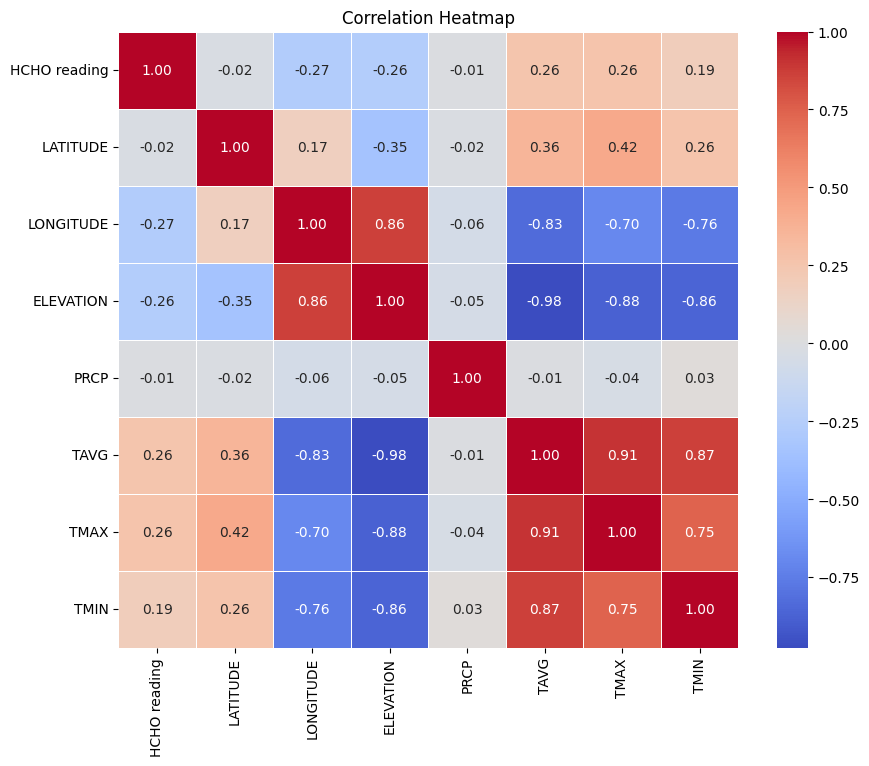

In [23]:
# Filter out numerical columns
numerical_columns = combined_data_merged.select_dtypes(include=['int64', 'float64']).columns

# Calculate correlation matrix
correlation_matrix = combined_data_merged[numerical_columns].corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# HCHO Reading vs External Factors

## Elevation vs HCHO Reading

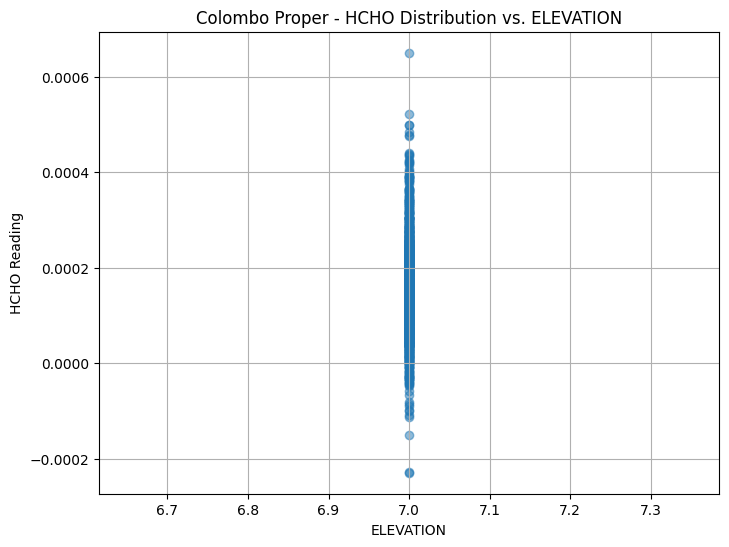

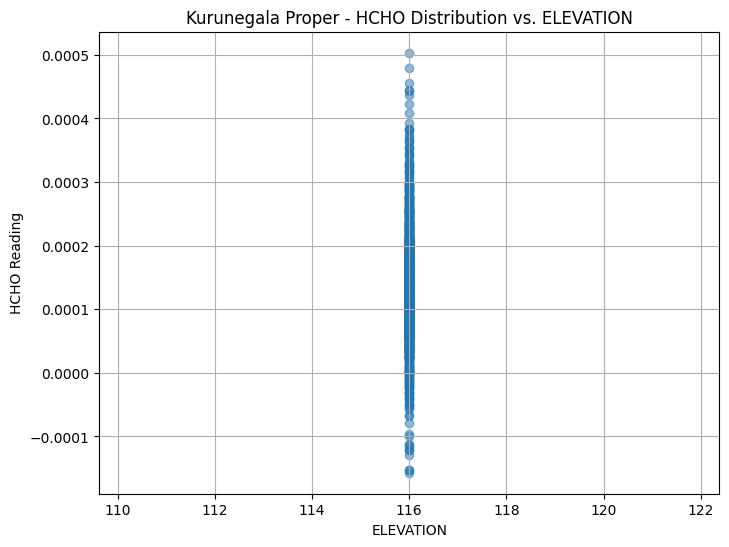

In [24]:
# Group the data by cities
grouped_data = combined_data_merged.groupby('Location')

# Specify contributing factor
contributing_factor = 'ELEVATION'

# Iterate over each city
for city, data in grouped_data:
    # Create a new plot for each city and contributing factor combination
    plt.figure(figsize=(8, 6))
    
    # Plot HCHO readings vs. contributing factor for the current city
    plt.scatter(data[contributing_factor], data['HCHO reading'], alpha=0.5)
    
    # Set plot title and labels
    plt.title(f'{city} - HCHO Distribution vs. {contributing_factor}')
    plt.xlabel(contributing_factor)
    plt.ylabel('HCHO Reading')
    
    # Show plot
    plt.grid(True)
    plt.show()

## Precipitation Vs HCHO Reading

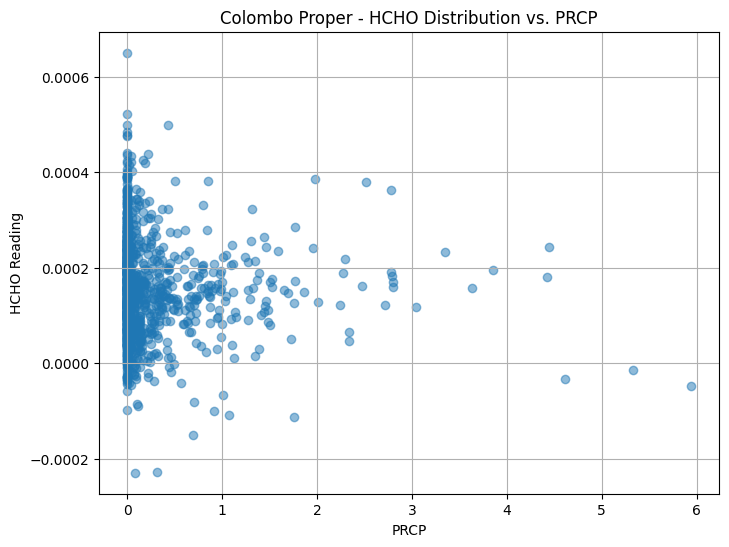

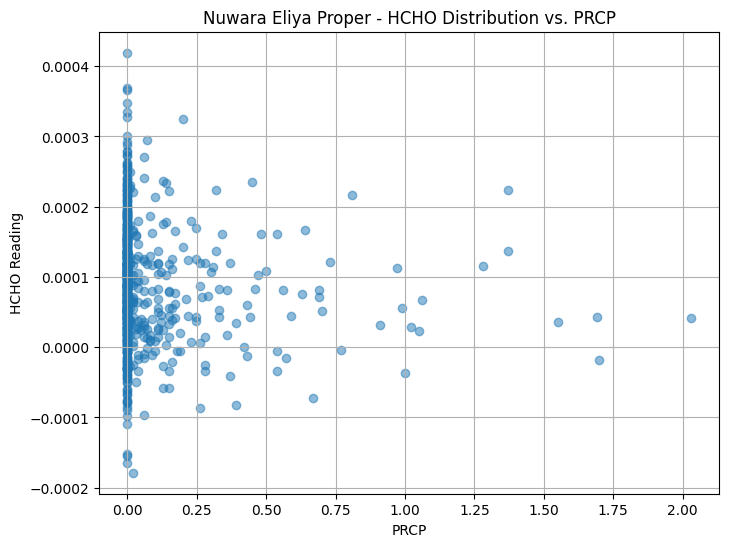

In [25]:
# Group the data by cities
grouped_data = combined_data_merged.groupby('Location')

# Specify contributing factor
contributing_factor = 'PRCP'

# Iterate over each city
for city, data in grouped_data:
    # Create a new plot for each city and contributing factor combination
    plt.figure(figsize=(8, 6))
    
    # Plot HCHO readings vs. contributing factor for the current city
    plt.scatter(data[contributing_factor], data['HCHO reading'], alpha=0.5)
    
    # Set plot title and labels
    plt.title(f'{city} - HCHO Distribution vs. {contributing_factor}')
    plt.xlabel(contributing_factor)
    plt.ylabel('HCHO Reading')
    
    # Show plot
    plt.grid(True)
    plt.show()


## Average temperature vs HCHO Reading

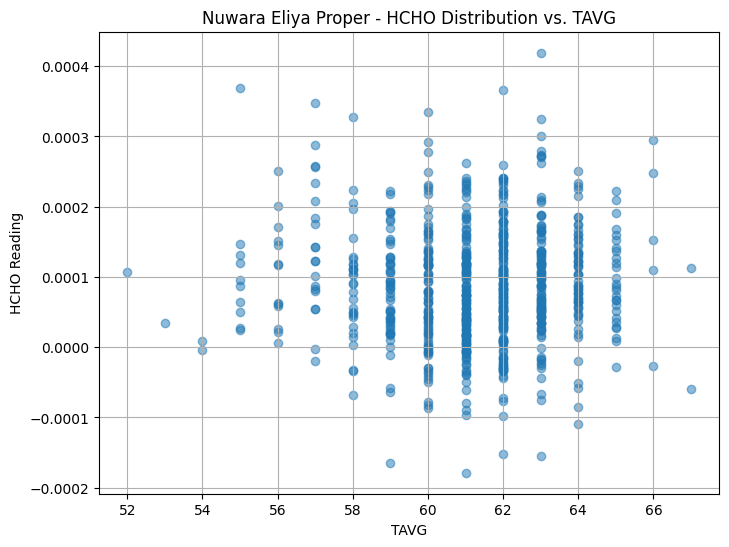

In [26]:
# Group the data by cities
grouped_data = combined_data_merged.groupby('Location')

# Specify contributing factor
contributing_factor = 'TAVG'

# Iterate over each city
for city, data in grouped_data:
    # Create a new plot for each city and contributing factor combination
    plt.figure(figsize=(8, 6))
    
    # Plot HCHO readings vs. contributing factor for the current city
    plt.scatter(data[contributing_factor], data['HCHO reading'], alpha=0.5)
    
    # Set plot title and labels
    plt.title(f'{city} - HCHO Distribution vs. {contributing_factor}')
    plt.xlabel(contributing_factor)
    plt.ylabel('HCHO Reading')
    
    # Show plot
    plt.grid(True)
    plt.show()

# Maximum Temperature vs HCHO Reading

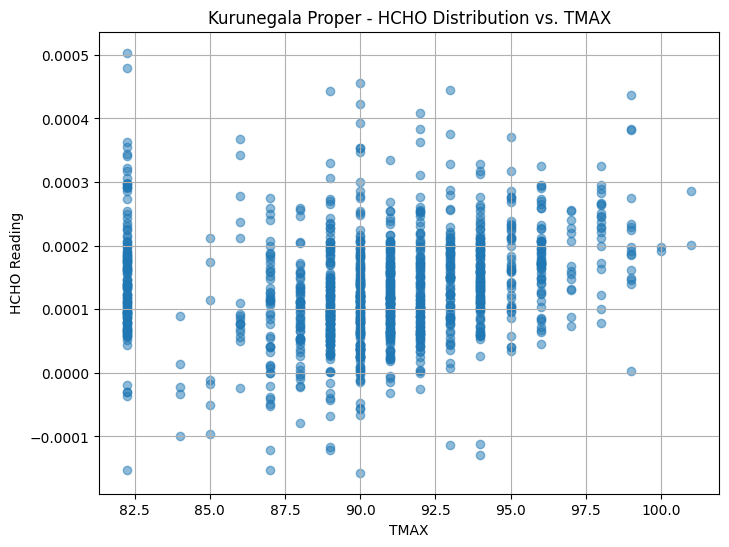

In [27]:
# Group the data by cities
grouped_data = combined_data_merged.groupby('Location')

# Specify contributing factor
contributing_factor = 'TMAX'

# Iterate over each city
for city, data in grouped_data:
    # Create a new plot for each city and contributing factor combination
    plt.figure(figsize=(8, 6))
    
    # Plot HCHO readings vs. contributing factor for the current city
    plt.scatter(data[contributing_factor], data['HCHO reading'], alpha=0.5)
    
    # Set plot title and labels
    plt.title(f'{city} - HCHO Distribution vs. {contributing_factor}')
    plt.xlabel(contributing_factor)
    plt.ylabel('HCHO Reading')
    
    # Show plot
    plt.grid(True)
    plt.show()

## Minimum temperature vs HCHO Reading

In [28]:
# Group the data by cities
grouped_data = combined_data_merged.groupby('Location')

# Specify contributing factor
contributing_factor = 'TMIN'

# Iterate over each city
for city, data in grouped_data:
    # Create a new plot for each city and contributing factor combination
    plt.figure(figsize=(8, 6))
    
    # Plot HCHO readings vs. contributing factor for the current city
    plt.scatter(data[contributing_factor], data['HCHO reading'], alpha=0.5)
    
    # Set plot title and labels
    plt.title(f'{city} - HCHO Distribution vs. {contributing_factor}')
    plt.xlabel(contributing_factor)
    plt.ylabel('HCHO Reading')
    
    # Show plot
    plt.grid(True)
    plt.show()

# **Saving the preprocessed dataframe as a CSV file**

In [29]:
# Save the DataFrame to a CSV file
combined_data_merged.to_csv('combined_dataset.csv', index=False)

# **Loading The Saved Dataset**

In [30]:
latest_ds = pd.read_csv('combined_dataset.csv')

latest_ds

HCHO reading           Location Current Date   Next Date        Date  \
0         0.000197     Colombo Proper   2019-01-01  2019-01-02  2019-01-01   
1         0.000263     Colombo Proper   2019-01-02  2019-01-03  2019-01-02   
2         0.000099     Colombo Proper   2019-01-03  2019-01-04  2019-01-03   
3         0.000210     Colombo Proper   2019-01-04  2019-01-05  2019-01-04   
4         0.000179     Colombo Proper   2019-01-05  2019-01-06  2019-01-05   
...            ...                ...          ...         ...         ...   
5225      0.000075  Kurunegala Proper   2023-12-27  2023-12-28  2023-12-27   
5226           NaN  Kurunegala Proper   2023-12-28  2023-12-29  2023-12-28   
5227           NaN  Kurunegala Proper   2023-12-29  2023-12-30  2023-12-29   
5228      0.000158  Kurunegala Proper   2023-12-30  2023-12-31  2023-12-30   
5229           NaN  Kurunegala Proper   2023-12-31  2024-01-01  2023-12-31   

      LATITUDE  LONGITUDE  ELEVATION  PRCP  TAVG       TMAX  TMIN  
0        6.900     79.867        7.0  0.00    81  89.000000  74.0  
1        6.900     79.867        7.0  0.00    78  82.259307  74.0  
2        6.900     79.867        7.0  0.00    81  90.000000  74.0  
3        6.900     79.867        7.0  0.00    81  91.000000  72.0  
4        6.900     79.867        7.0  0.00    81  90.000000  74.0  
...        ...        ...        ...   ...   ...        ...   ...  
5225     7.467     80.367      116.0  0.47    81  88.000000  76.0  
5226     7.467     80.367      116.0  0.29    79  83.000000  76.0  
5227     7.467     80.367      116.0  0.38    77  82.000000  75.0  
5228     7.467     80.367      116.0  0.47    80  87.000000  74.0  
5229     7.467     80.367      116.0  0.06    79  87.000000  75.0  

[5230 rows x 12 columns]